Plotting cell quantification results by 
- Diagnosis
- for PSP, separated by PSP stage

In [1]:
import sys
sys.path.insert(0,
                '/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Cell_pipeline/Cell_quantification/')
from helper_functions import *
from plotting import *
import pandas as pd

In [2]:
# import plotting functions
import seaborn as sns

**Read in data**

In [3]:
cortical = pd.read_csv('C:/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Cell_pipeline/Cell_quantification/Data/cell_counts_cortical_negative_027.txt',sep='\t')
occipital = pd.read_csv('C:/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Cell_pipeline/Cell_quantification/Data/cell_counts_occipital_negative_027.txt',sep='\t')
bg = pd.read_csv('C:/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Cell_pipeline/Cell_quantification/Data/cell_counts_BG_negative_027.txt',sep='\t')

In [4]:
# separate nuclei from BG 
str = bg[bg['region_name']=='Striatum']
stn = bg[bg['region_name']=='Subthalamic Nucleus']
gp = bg[bg['region_name']=='Globus Pallidus']

**Read in area information**

In [5]:
# Read in annotation area (for cell density calculation) - But we need to find area for control slides too etc. 
areas = pd.read_csv('C:/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Cell_pipeline/Cell_quantification/Data/wm_gm_bg_areas.txt',sep='\t')
areas = areas.rename(columns={'Image':'Image_name'})

**Read in more meta data about PSP stage**

In [6]:
# meta data (1): region name, PSP stage
metadata_taupipeline = pd.read_csv('/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Metadata/PSP_tau_classification_MAY2023.txt',
                    sep = '\t')
metadata_ = metadata_taupipeline[['PSP Stage','Patient_ID','Slice_ID','region_name','Diagnosis']]

In [7]:
# Split basal ganglia into 3 nuclei
metadata_bg = metadata_[metadata_['region_name']=='basal ganglia']

metadata_stn = metadata_bg.copy() 
metadata_stn.loc[:,'region_name'] = ['Subthalamic Nucleus'] * metadata_stn.shape[0]

metadata_pu = metadata_bg.copy() 
metadata_pu.loc[:,'region_name'] = ['Striatum'] * metadata_pu.shape[0]

metadata_gp = metadata_bg.copy() 
metadata_gp.loc[:,'region_name'] = ['Globus Pallidus'] * metadata_gp.shape[0]

In [8]:
metadata_not_bg = metadata_[metadata_['region_name']!='basal ganglia']

In [9]:
metadata = pd.concat([metadata_not_bg,
                      metadata_stn,
                      metadata_pu,
                      metadata_gp])

In [10]:
print(metadata.shape)
metadata.head()

(380, 5)


,PSP Stage,Patient_ID,Slice_ID,region_name,Diagnosis
0,2_01,NP19-00221,S747324,frontal,PSP
1,2_01,NP19-00221,S747390,occipital,PSP
2,2_01,NP19-00221,S760051,frontal,PSP
3,2_01,NP19-00221,S760052,temporal,PSP
4,2_01,NP19-00221,S760053,parietal,PSP


In [11]:
metadata['region_name'].value_counts()

Globus Pallidus          38
Striatum                 38
Subthalamic Nucleus      38
frontal                  37
occipital                36
cerebellum               36
temporal                 27
cingulate                25
primary somatosensory    25
parietal                 25
premo motor              25
primary motor            25
Name: region_name, dtype: int64

In [12]:
# metadata (2): semi-quantitative info
semi_quan = pd.read_csv('/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Metadata/Pathology_assessment_and_demography.csv',sep=',')
semi_quan.head()

,REDCap ID,Patient_ID,JR Number,JR,GP_SK,STN_SK,STR_SK,FCF_SK,DE_SK,OC_SK,...,Age at Death,disease duration (years),MDS_first,MDS-PSP last visit,years PSPRS and death,years ACER and death,PSPRS Total (last assesment),ACE-R last assesment,imputed ACER at average,imputed PSPRS at death_average
0,636.0,NP19-00221,133.0,JR133,2.0,2.0,2.0,0.0,1.0,0.0,...,76.4,8.750000,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.20,62.60
1,3088.0,NP20-00012,139.0,JR139,3.0,3.0,2.0,0.0,1.0,0.0,...,75.2,4.619178,poss. PSP-PGF,poss. PSP-PGF,0.52,0.52,26.0,97.0,93.49,28.18
2,138.0,NP17-00242,94.0,JR94,2.0,2.0,2.0,1.0,1.0,0.0,...,55.0,5.500000,prob. PSP-RS,prob. PSP-RS,0.41,0.41,53.0,77.0,78.14,52.73
3,2437.0,NP18-00007,99.0,JR99,2.0,2.0,2.0,1.0,1.0,0.0,...,74.5,6.000000,prob. PSP-RS,prob. PSP-RS,0.67,0.67,45.0,79.0,75.23,55.98
4,453.0,NP18-00004,98.0,JR98,2.0,2.0,2.0,1.0,1.0,0.0,...,84.7,5.580000,prob. PSP-RS,prob. PSP-RS,1.25,1.25,59.0,66.0,71.44,58.97


In [13]:
# Merge the two metadata(s) together
meta = metadata.merge(semi_quan,on=['Patient_ID'])
print(meta.shape)
meta.head()

(380, 26)


,PSP Stage,Patient_ID,Slice_ID,region_name,Diagnosis,REDCap ID,JR Number,JR,GP_SK,STN_SK,...,Age at Death,disease duration (years),MDS_first,MDS-PSP last visit,years PSPRS and death,years ACER and death,PSPRS Total (last assesment),ACE-R last assesment,imputed ACER at average,imputed PSPRS at death_average
0,2_01,NP19-00221,S747324,frontal,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6
1,2_01,NP19-00221,S747390,occipital,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6
2,2_01,NP19-00221,S760051,frontal,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6
3,2_01,NP19-00221,S760052,temporal,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6
4,2_01,NP19-00221,S760053,parietal,PSP,636.0,133.0,JR133,2.0,2.0,...,76.4,8.75,prob. PSP-RS,prob. PSP-RS,0.32,0.32,63.0,94.0,86.2,62.6


**Calculate cell density**

In [14]:
# Format areas dataframe so can merge with cell counts dataframe for each region

# cortical
cortical_df = cortical.merge(areas[['Image_name','GM']],on=['Image_name'])
cortical_df = cortical_df.rename(columns={'GM':'Area'})

# occipital
occipital_df = occipital.merge(areas[['Image_name','GM']],on=['Image_name'])
occipital_df = occipital_df.rename(columns={'GM':'Area'})

# STR 
str_df = str.merge(areas[['Image_name','STR']],on=['Image_name'])
str_df = str_df.rename(columns={'STR':'Area'})

# STN 
stn_df = stn.merge(areas[['Image_name','STN']],on=['Image_name'])
stn_df = stn_df.rename(columns={'STN':'Area'})

# GP
gp_df = gp.merge(areas[['Image_name','GP']],on=['Image_name'])
gp_df = gp_df.rename(columns={'GP':'Area'})

In [15]:
# combine data together
data_orig = pd.concat([cortical_df,
                       occipital_df,
                       str_df,
                       stn_df,
                       gp_df])

In [16]:
# calculate more metrics of interest
data = cell_density_negative(data_orig)
data.head()


,Image_name,Astro,Neuron,Oligo,Others,Ambiguous,Total,p_Astro,p_Neuron,p_Oligo,...,keycell,d_keycell,d_Astro-,d_Oligo-,d_Neuron-,d_Others-,keycell-,d_keycell-,GNR-,GNR
0,703471.svs,10748,30276,52581,42178,26763,135783,0.079156,0.222973,0.387243,...,93605,0.000721,0.000082,0.000401,0.000230,0.000313,92576,0.000713,2.099193,2.091723
1,703472.svs,11066,34474,85252,51657,40714,182449,0.060653,0.188951,0.467265,...,130792,0.000789,0.000067,0.000513,0.000207,0.000308,130405,0.000787,2.794483,2.793932
2,703473.svs,20508,59339,106671,78627,58055,265145,0.077346,0.223798,0.402312,...,186518,0.000836,0.000092,0.000476,0.000264,0.000347,185352,0.000831,2.146412,2.143262
3,703482.svs,16934,43664,28309,33816,17398,122723,0.137986,0.355793,0.230674,...,88907,0.000748,0.000142,0.000238,0.000366,0.000281,88753,0.000746,1.036226,1.036163
4,703483.svs,11285,30330,25230,34817,15399,101662,0.111005,0.298342,0.248175,...,66845,0.000594,0.000098,0.000221,0.000257,0.000272,64867,0.000577,1.245621,1.203924


**Merge cell density info with metadata**

In [17]:
# check cell density df shape
print('cell density df shape:', data.shape)

# Change image_name column to slice ID
data = data.copy()
data.loc[:,'Slice_ID'] = ['S'+i[0:6] for i in data['Image_name']]

# check meta data df shape
print('meta shape: ', meta.shape)

# Merge them & check shape
data1 = data.merge(meta,on=['Slice_ID','Patient_ID','region_name','Diagnosis'],how='left')
print('data1 shape: ', data1.shape)

cell density df shape: (346, 35)
meta shape:  (380, 26)
data1 shape:  (346, 58)


In [18]:
data1['Diagnosis'].value_counts()

PSP        316
Control     30
Name: Diagnosis, dtype: int64

In [19]:
region_code = {'primary motor':'Primary motor',
                    'cingulate':'Cingulate',
                    'occipital':'Occipital',
                    'primary somatosensory':'Primary somatosensory',
                    'temporal':'Temporal',
                    'premo motor':'Pre-motor',
                    'frontal':'Pre-frontal',
                    'parietal':'Parietal',
                    'Subthalamic Nucleus':'Subthalamic nucleus',
                    'Striatum':'Putamen',
                    'Globus Pallidus': 'Globus pallidus'}

In [20]:
data1 = data1.copy()
data1.loc[:,'region_name'] = [region_code[i] for i in data1['region_name']]

### Let's extract some details

In [21]:
# Check number of slides in our analysis 
len(list(set(data1['Image_name'])))

280

In [22]:
# Check number of PSP subjects
len(list(set(data1[data1['Diagnosis']=='PSP']['Patient_ID'])))

36

In [23]:
# Check number of control subjects
len(list(set(data1[data1['Diagnosis']=='Control']['Patient_ID'])))

9

In [24]:
# Check training slides 
training_dat = data1[data1['Comments']=='training']
print('number of training slides',len(list(set(training_dat['Image_name']))))
training_dat[['Image_name','region_name','Diagnosis']][['region_name','Diagnosis']].value_counts()

number of training slides 28


region_name          Diagnosis
Globus pallidus      PSP          7
Putamen              PSP          7
Occipital            PSP          6
Subthalamic nucleus  PSP          4
Occipital            Control      2
Parietal             Control      2
                     PSP          2
Pre-frontal          Control      2
                     PSP          2
Temporal             Control      2
                     PSP          2
Globus pallidus      Control      1
Putamen              Control      1
dtype: int64

In [25]:
training_dat.head()

,Image_name,Astro,Neuron,Oligo,Others,Ambiguous,Total,p_Astro,p_Neuron,p_Oligo,...,Age at Death,disease duration (years),MDS_first,MDS-PSP last visit,years PSPRS and death,years ACER and death,PSPRS Total (last assesment),ACE-R last assesment,imputed ACER at average,imputed PSPRS at death_average
5,703484.svs,11970,40274,30802,31271,16044,114317,0.104709,0.352301,0.269444,...,71.0,5.42,prob. PSP-RS,prob. PSP-RS,1.89,1.89,43.0,88.0,86.06,51.73
17,721701.svs,14589,27081,44798,50812,30617,137280,0.106272,0.197268,0.326326,...,78.7,5.33,prob. PSP-F,prob. PSP-RS,0.56,0.56,54.0,77.0,82.66,48.92
25,721735.svs,33099,70545,37033,68602,30086,209279,0.158157,0.337086,0.176955,...,63.0,8.83,prob. PSP-RS,prob. PSP-RS,2.44,1.86,62.0,90.0,85.30,66.17
26,721771.svs,25413,67544,36991,59626,28240,189574,0.134053,0.356294,0.195127,...,63.0,8.83,prob. PSP-RS,prob. PSP-RS,2.44,1.86,62.0,90.0,85.30,66.17
32,721856.svs,20961,56169,71133,76166,49343,224429,0.093397,0.250275,0.316951,...,55.0,5.50,prob. PSP-RS,prob. PSP-RS,0.41,0.41,53.0,77.0,78.14,52.73


In [26]:
# Check training slides 
novel_dat = data1[data1['Comments']=='novel']
print('number of novel slides',len(list(set(novel_dat['Image_name']))))
novel_dat[['Image_name','region_name','Diagnosis']][['region_name','Diagnosis']].value_counts()

number of novel slides 252


region_name            Diagnosis
Pre-frontal            PSP          35
Occipital              PSP          29
Globus pallidus        PSP          27
Putamen                PSP          27
Cingulate              PSP          25
Subthalamic nucleus    PSP          25
Primary somatosensory  PSP          25
Pre-motor              PSP          24
Primary motor          PSP          23
Temporal               PSP          23
Parietal               PSP          23
Temporal               Control       6
Pre-frontal            Control       5
Parietal               Control       3
Occipital              Control       2
Putamen                Control       1
Subthalamic nucleus    Control       1
Globus pallidus        Control       1
Cingulate              Control       1
dtype: int64

### Let's check GNR

In [27]:
cortical_regions = ['Primary motor',
                    'Cingulate',
                    'Occipital',
                    'Primary somatosensory',
                    'Temporal',
                    'Pre-motor',
                    'Pre-frontal',
                    'Parietal']

[Text(0.5, 0, 'Glia:neuron ratio'), Text(0, 0.5, 'Brain region')]

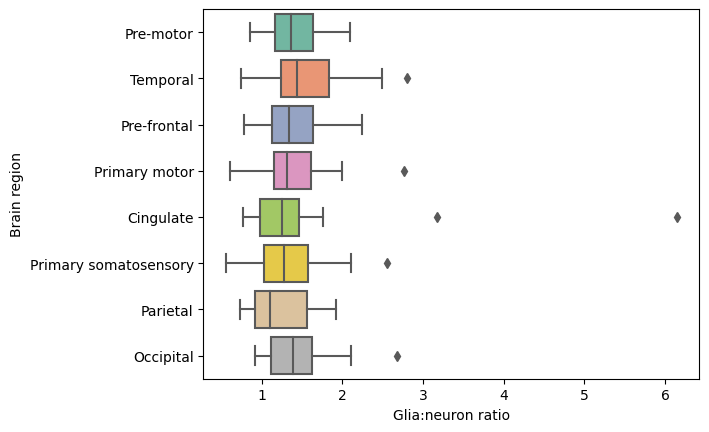

In [28]:
# Check GNR in cortical regions
data1_cortex = novel_dat[novel_dat['region_name'].isin(cortical_regions)]
ax = sns.boxplot(data1_cortex,
                 y='region_name',
                 x='GNR-',
                 palette='Set2')
ax.set(xlabel='Glia:neuron ratio',
       ylabel='Brain region')

In [29]:
data1_cortex.groupby(['region_name'])['GNR'].mean()

region_name
Cingulate                1.472828
Occipital                1.461745
Parietal                 1.212111
Pre-frontal              1.390340
Pre-motor                1.394445
Primary motor            1.364855
Primary somatosensory    1.315742
Temporal                 1.564298
Name: GNR, dtype: float64

In [30]:
data1_cortex.groupby(['region_name'])['GNR-'].mean()

region_name
Cingulate                1.477191
Occipital                1.457533
Parietal                 1.212152
Pre-frontal              1.389396
Pre-motor                1.402663
Primary motor            1.375687
Primary somatosensory    1.319612
Temporal                 1.564728
Name: GNR-, dtype: float64

[Text(0.5, 0, 'Glia:neuron ratio'), Text(0, 0.5, 'Brain region')]

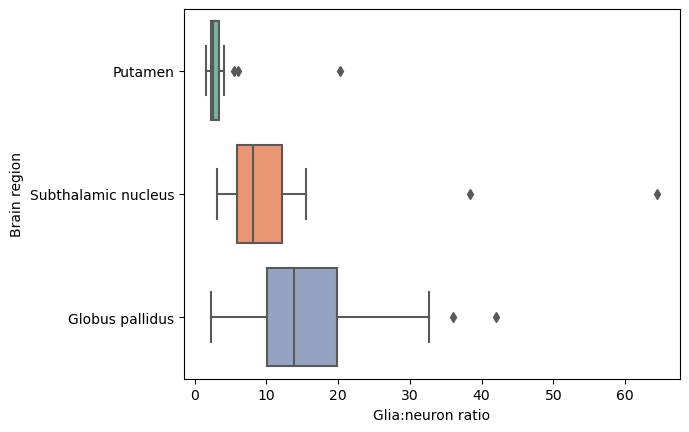

In [31]:
# Check GNR in cortical regions
data1_subcortex = novel_dat[ ~novel_dat['region_name'].isin(cortical_regions)]
ax = sns.boxplot(data1_subcortex,
                 y='region_name',
                 x='GNR-',
                 palette='Set2')
ax.set(xlabel='Glia:neuron ratio',
       ylabel='Brain region')

In [32]:
data1_subcortex.groupby(['region_name'])['GNR'].mean()

region_name
Globus pallidus        15.395340
Putamen                 3.434388
Subthalamic nucleus    10.617696
Name: GNR, dtype: float64

In [33]:
data1_subcortex.groupby(['region_name'])['GNR-'].mean()

region_name
Globus pallidus        16.379132
Putamen                 3.446389
Subthalamic nucleus    11.517852
Name: GNR-, dtype: float64

### Let's do some plotting: cell density check 

In [34]:
data1_subset = novel_dat[['Image_name','d_Astro-','d_Oligo-','d_Neuron-','d_Others-','region_name']]
data1_subset_melt = data1_subset.melt(id_vars=['Image_name','region_name'],value_vars=['d_Astro-','d_Oligo-','d_Neuron-','d_Others-'])

C:\Users\mokur\AppData\Local\Temp\ipykernel_6736\2252907097.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


[Text(-0.0002, 0, '−0.0002'),
 Text(0.0, 0, '0.0000'),
 Text(0.0002, 0, '0.0002'),
 Text(0.0004000000000000001, 0, '0.0004'),
 Text(0.0006000000000000001, 0, '0.0006'),
 Text(0.0008, 0, '0.0008'),
 Text(0.001, 0, '0.0010'),
 Text(0.0012, 0, '0.0012'),
 Text(0.0014, 0, '0.0014')]

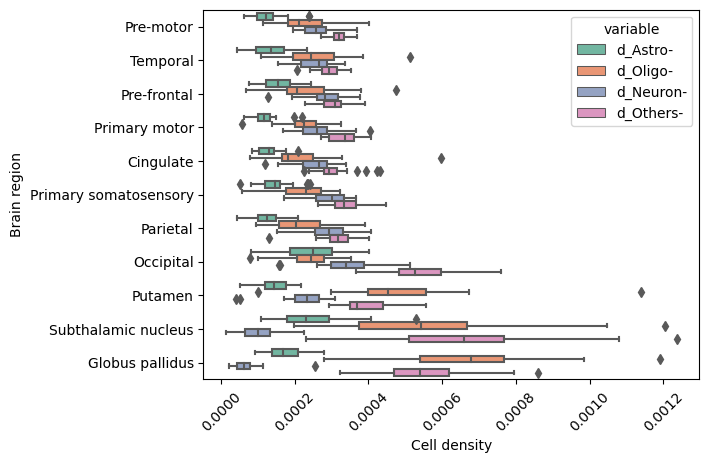

In [35]:
# Cell density (PSP & control combined)
ax = sns.boxplot(data1_subset_melt,
                 y='region_name',
                 x='value',
                 hue='variable',
                 palette='Set2')
ax.set(xlabel='Cell density',
       ylabel='Brain region')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### Let's do some plotting: Control vs PSP

**1) Cell type-specific density in each brain region**

In [36]:
# See which regions controls have: 
print('regions that controls have:',set(novel_dat[novel_dat['Diagnosis']=='Control']['region_name']))
print('unique no. of controls: ',len(list(set(novel_dat[novel_dat['Diagnosis']=='Control']['Patient_ID']))))

regions that controls have: {'Occipital', 'Globus pallidus', 'Putamen', 'Temporal', 'Parietal', 'Cingulate', 'Pre-frontal', 'Subthalamic nucleus'}
unique no. of controls:  8


In [37]:
# First, subset data to only contain regions that controls have:

regions_controls_have = list(set(novel_dat[novel_dat['Diagnosis']=='Control']['region_name']))
data2 = novel_dat[novel_dat['region_name'].isin(regions_controls_have)]

data2_subset = data2[['Image_name','d_Astro','d_Oligo','d_Neuron','d_Others','d_keycell',
                      'd_Astro-','d_Oligo-','d_Neuron-','d_Others-','d_keycell-',
                      'Diagnosis','region_name']]

[Text(0.5, 0, 'Key cell density'), Text(0, 0.5, 'Brain region')]

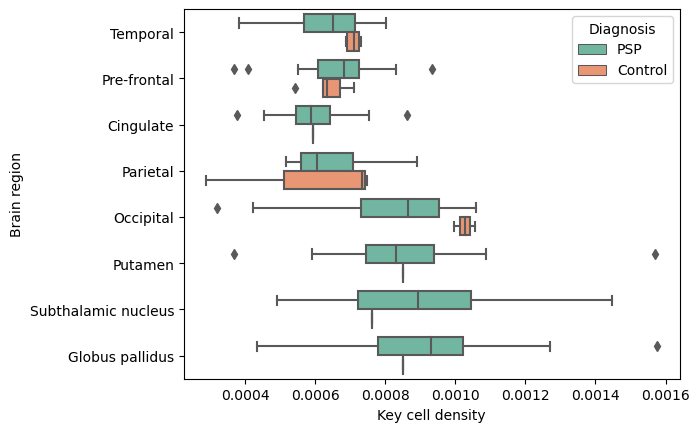

In [38]:
# keycell density in control vs PSP
ax = sns.boxplot(data2_subset,
                 y='region_name',
                 x='d_keycell-',
                 hue='Diagnosis',
                 palette='Set2')
ax.set(xlabel='Key cell density',
       ylabel='Brain region')

- PSP appear to have lower keycell density

[Text(0.5, 0, 'Astrocytic density'), Text(0, 0.5, 'Brain region')]

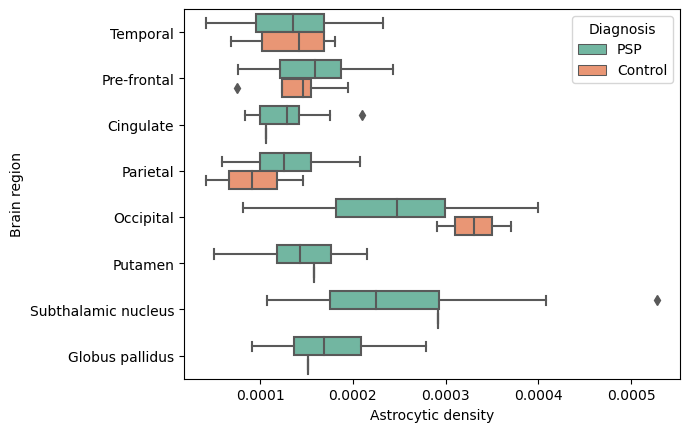

In [39]:
# Astrocyte density in control vs PSP
ax = sns.boxplot(data2_subset,
                 y='region_name',
                 x='d_Astro-',
                 hue='Diagnosis',
                 palette='Set2')
ax.set(xlabel='Astrocytic density',
       ylabel='Brain region')

[Text(0.5, 0, 'Neuronal density'), Text(0, 0.5, 'Brain region')]

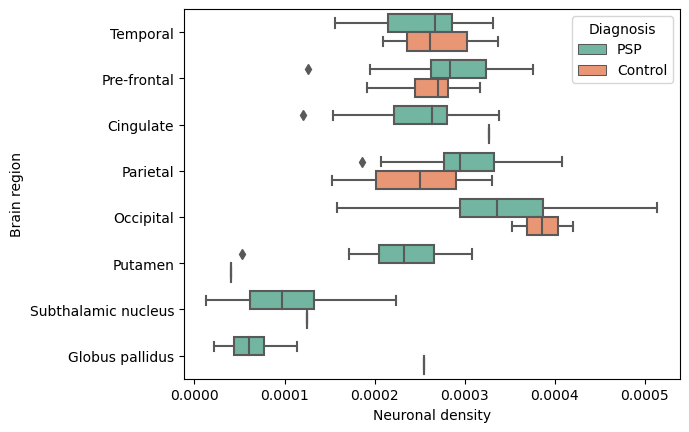

In [40]:
# Neuronal density in control vs PSP
ax = sns.boxplot(data2_subset,
                 y='region_name',
                 x='d_Neuron-',
                 hue='Diagnosis',
                 palette='Set2')
ax.set(xlabel='Neuronal density',
       ylabel='Brain region')

[Text(0.5, 0, 'Oligodendroglial density'), Text(0, 0.5, 'Brain region')]

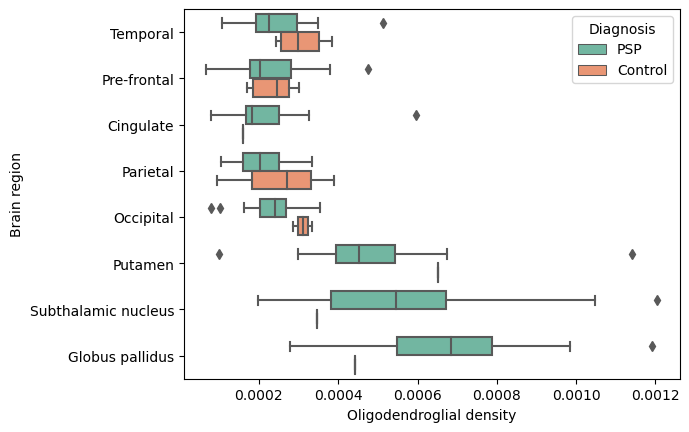

In [41]:
# Oligo density in control vs PSP
ax = sns.boxplot(data2_subset,
                 y='region_name',
                 x='d_Oligo-',
                 hue='Diagnosis',
                 palette='Set2')
ax.set(xlabel='Oligodendroglial density',
       ylabel='Brain region')

### Let's do some plotting: only PSP

In [42]:
psp_only = novel_dat[novel_dat['Diagnosis']=='PSP']
psp_only_stage = psp_only[~psp_only['Stage_SK'].isna()]
t1, t2, t3 = data_inspection(psp_only_stage)

No. of unique patients:  33


In [43]:
t1

,Regions,Stage 2,Stage 3,Stage 4,Stage 5,Stage 6
0,Occipital,3,4,10,8,1
1,Primary motor,1,3,6,10,1
2,Pre-motor,1,4,5,10,2
3,Globus pallidus,2,3,8,11,2
4,Putamen,2,3,8,11,2
5,Temporal,2,2,7,8,2
6,Parietal,2,4,5,9,1
7,Cingulate,2,3,6,10,2
8,Pre-frontal,3,3,11,13,2
9,Primary somatosensory,2,4,6,9,2


In [44]:
t2

,Stage_SK,Counts
3,2.0,2
2,3.0,4
1,4.0,10
0,5.0,15
4,6.0,2


In [45]:
t3

,PSP subtype,Counts
0,prob. PSP-RS,23
1,poss. PSP-CBS,4
2,s.o. PSP-CBS,3
3,poss. PSP-PGF,1
4,prob. PSP-F,1
5,poss. PSP-SL,1


1. For PSP only, cell density per region

[Text(0.5, 0, 'Cell density'), Text(0, 0.5, 'Brain region')]

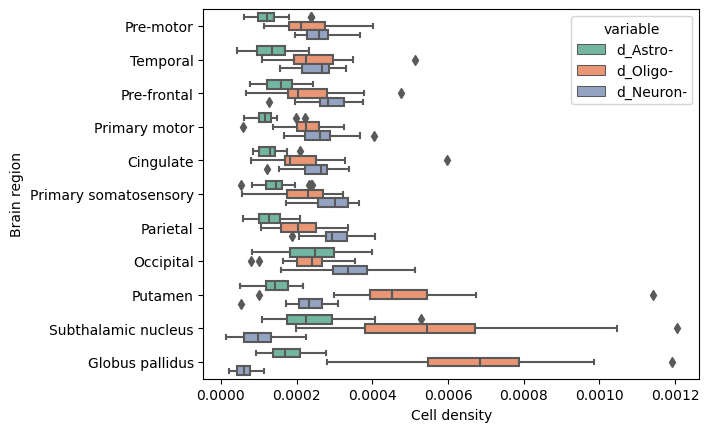

In [46]:
psp_only_subset = psp_only[['Image_name','d_Astro-','d_Oligo-','d_Neuron-','region_name']]
psp_only_subset_melt = psp_only_subset.melt(id_vars=['Image_name','region_name'],value_vars=['d_Astro-','d_Oligo-','d_Neuron-'])

# Cell density (PSP only)
ax = sns.boxplot(psp_only_subset_melt,
                 y='region_name',
                 x='value',
                 hue='variable',
                 palette='Set2')
ax.set(xlabel='Cell density',
       ylabel='Brain region')

**3. Cell density, tau positive density per PSP stage & region**

In [47]:
anatomical_order = ['Subthalamic nucleus',
                    'Globus pallidus',
                    'Putamen',

                    'Pre-frontal',
                    'Pre-motor',
                    'Primary motor',
                    'Primary somatosensory',
                    'Temporal',
                    'Parietal',
                    'Occipital',
                    'Cingulate']

In [48]:
psp_only_stage_formatted = psp_only[~psp_only['Stage_SK'].isna()]
psp_only_stage_formatted = psp_only_stage_formatted.copy()
psp_only_stage_formatted.loc[:,'Stage'] = [int(i) for i in psp_only_stage_formatted['Stage_SK']]

In [49]:
set(psp_only['region_name'])

{'Cingulate',
 'Globus pallidus',
 'Occipital',
 'Parietal',
 'Pre-frontal',
 'Pre-motor',
 'Primary motor',
 'Primary somatosensory',
 'Putamen',
 'Subthalamic nucleus',
 'Temporal'}

In [50]:
set(psp_only_stage_formatted['region_name'])

{'Cingulate',
 'Globus pallidus',
 'Occipital',
 'Parietal',
 'Pre-frontal',
 'Pre-motor',
 'Primary motor',
 'Primary somatosensory',
 'Putamen',
 'Subthalamic nucleus',
 'Temporal'}

In [51]:
x = psp_only[psp_only['Stage_SK'].isna()]
set(x['region_name'])

{'Cingulate',
 'Globus pallidus',
 'Occipital',
 'Parietal',
 'Pre-frontal',
 'Pre-motor',
 'Primary motor',
 'Primary somatosensory',
 'Putamen',
 'Subthalamic nucleus',
 'Temporal'}

**Cell density**

[Text(0, 0.5, 'Neuronal density'), Text(0.5, 0, 'Stage')]

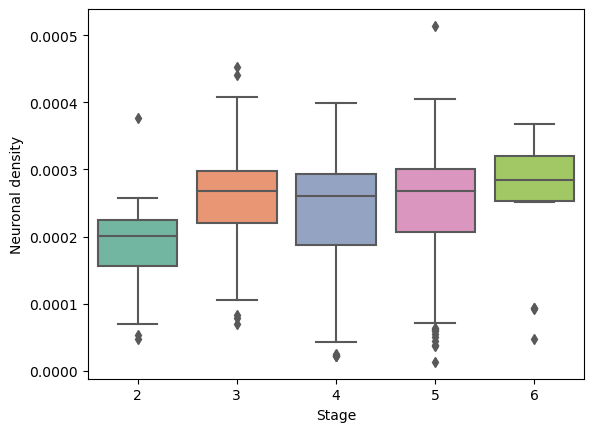

In [52]:
# Neuronal density (PSP only) per stage across all regions
ax = sns.boxplot(psp_only_stage_formatted,
                 y='d_Neuron-',
                 x='Stage',
                 palette='Set2')
ax.set(ylabel='Neuronal density',
       xlabel='Stage')

- We plot this, anticipating a neuronal loss (lower density?)
- This could be used to indicate something dogy, why more neuronal density as we go up the PSP stage?
- Linking to slide inspection between Sanne & Annelies: astrocytes are bigger at worser disease stage, more likely to be mistaken for neurons.

[Text(0, 0.5, 'Astrocytic density'), Text(0.5, 0, 'Stage')]

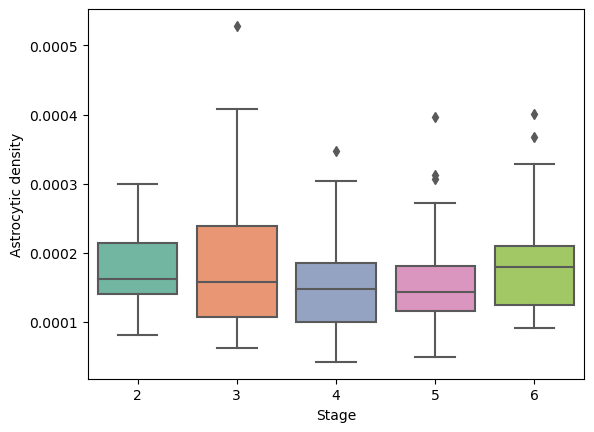

In [56]:
# Neuronal density (PSP only) per stage across all regions
ax = sns.boxplot(psp_only_stage_formatted,
                 y='d_Astro-',
                 x='Stage',
                 palette='Set2')
ax.set(ylabel='Astrocytic density',
       xlabel='Stage')

In [145]:
psp_only_stage_formatted[(psp_only_stage_formatted['Stage_SK']==6)&(psp_only_stage_formatted['region_name']=='Pre-motor')]

,Image_name,Astro,Neuron,Oligo,Others,Ambiguous,Total,p_Astro,p_Neuron,p_Oligo,...,disease duration (years),MDS_first,MDS-PSP last visit,years PSPRS and death,years ACER and death,PSPRS Total (last assesment),ACE-R last assesment,imputed ACER at average,imputed PSPRS at death_average,Stage
107,760035.svs,15510,36547,32392,46754,27250,131203,0.118214,0.278553,0.246885,...,8.42,prob. PSP-F,prob. PSP-F,0.76,2.26,81.0,66.0,66.38,74.43,6
159,771791.svs,24801,50590,40231,52811,27889,168433,0.147245,0.300357,0.238855,...,8.42,s.o. PSP-CBS,s.o. PSP-CBS,0.23,2.19,73.0,71.0,64.77,72.65,6


C:\Users\mokur\AppData\Local\Temp\ipykernel_20352\929367228.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


[Text(-0.0001, 0, '−0.0001'),
 Text(0.0, 0, '0.0000'),
 Text(0.0001, 0, '0.0001'),
 Text(0.00020000000000000004, 0, '0.0002'),
 Text(0.00030000000000000003, 0, '0.0003'),
 Text(0.0004, 0, '0.0004'),
 Text(0.0005, 0, '0.0005'),
 Text(0.0006, 0, '0.0006')]

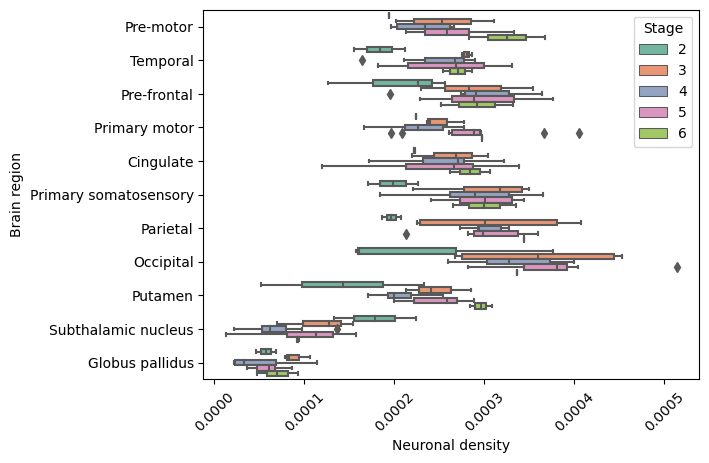

In [146]:
# Cell density (PSP only) per stage & region
ax = sns.boxplot(psp_only_stage_formatted,
                 y='region_name',
                 x='d_Neuron-',
                 hue='Stage',
                 palette='Set2')
ax.set(xlabel='Neuronal density',
       ylabel='Brain region')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

- This plot makes it more obvious than lower PSP stages have lesser neuronal density than later PSP stage
- This also makes me wonder if we should use 'cell proportion' over 'cell density' - potentially to do with brain slice shrinkage?

**Cell proportion**

In [147]:
set(psp_only_stage_formatted['region_name'])

{'Cingulate',
 'Globus pallidus',
 'Occipital',
 'Parietal',
 'Pre-frontal',
 'Pre-motor',
 'Primary motor',
 'Primary somatosensory',
 'Putamen',
 'Subthalamic nucleus',
 'Temporal'}

In [148]:
cortical = ['Cingulate',
 'Occipital',
 'Parietal',
 'Pre-frontal',
 'Pre-motor',
 'Primary motor',
 'Primary somatosensory',
 'Temporal']

In [149]:
psp_only_stage_formatted = psp_only_stage_formatted.copy()
psp_only_stage_formatted.loc[:,'Keycells-'] = psp_only_stage_formatted['Astro-'] + psp_only_stage_formatted['Neuron-'] + psp_only_stage_formatted['Oligo-']
psp_only_stage_formatted.loc[:,'pk_Astro-'] = psp_only_stage_formatted['Astro-'] / psp_only_stage_formatted['Keycells-']
psp_only_stage_formatted.loc[:,'pk_Neuron-'] = psp_only_stage_formatted['Neuron-'] / psp_only_stage_formatted['Keycells-']
psp_only_stage_formatted.loc[:,'pk_Oligo-'] = psp_only_stage_formatted['Oligo-'] / psp_only_stage_formatted['Keycells-']

In [150]:
psp_only_stage_formatted_cortical = psp_only_stage_formatted[psp_only_stage_formatted['region_name'].isin(cortical)]

[Text(0, 0.5, 'Proportion of tau negative neuronal cells in the cortex'),
 Text(0.5, 0, 'Stage')]

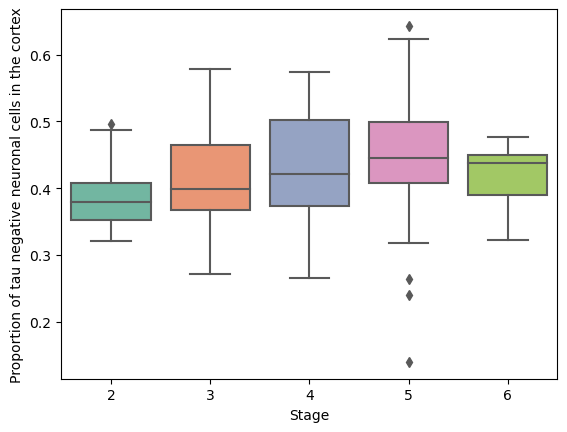

In [157]:
# Tau negative neurons / all tau negative cells: (PSP only) per stage across all regions
ax = sns.boxplot(psp_only_stage_formatted_cortical,
                 y='pk_Neuron-',
                 x='Stage',
                 palette='Set2')
ax.set(ylabel='Proportion of tau negative neuronal cells in the cortex',
       xlabel='Stage')

C:\Users\mokur\AppData\Local\Temp\ipykernel_20352\1357089379.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


[Text(-0.1, 0, '−0.1'),
 Text(0.0, 0, '0.0'),
 Text(0.1, 0, '0.1'),
 Text(0.20000000000000004, 0, '0.2'),
 Text(0.30000000000000004, 0, '0.3'),
 Text(0.4, 0, '0.4'),
 Text(0.5000000000000001, 0, '0.5'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.7000000000000001, 0, '0.7')]

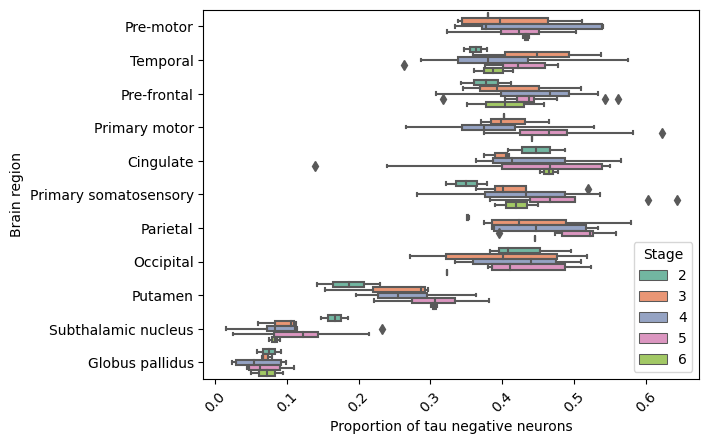

In [153]:
# Cell density (PSP only) per stage & region
ax = sns.boxplot(psp_only_stage_formatted,
                 y='region_name',
                 x='pk_Neuron-',
                 hue='Stage',
                 palette='Set2')
ax.set(xlabel='Proportion of tau negative neurons',
       ylabel='Brain region')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0.5, 'Proportion of tau negative astroglial cells in the cortex'),
 Text(0.5, 0, 'Stage')]

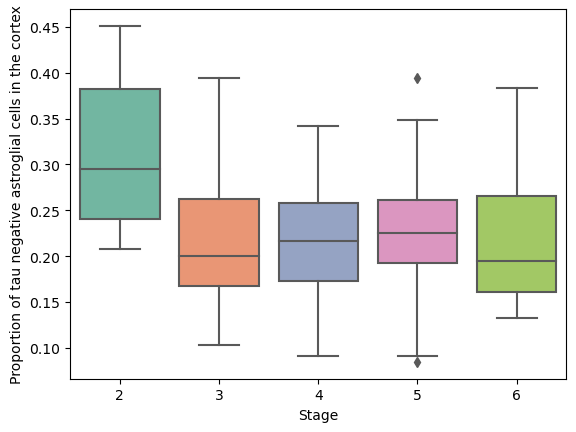

In [158]:
# Tau negative neurons / all tau negative cells: (PSP only) per stage across all regions
ax = sns.boxplot(psp_only_stage_formatted_cortical,
                 y='pk_Astro-',
                 x='Stage',
                 palette='Set2')
ax.set(ylabel='Proportion of tau negative astroglial cells in the cortex',
       xlabel='Stage')

C:\Users\mokur\AppData\Local\Temp\ipykernel_20352\3620120631.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


[Text(0.0, 0, '0.0'),
 Text(0.1, 0, '0.1'),
 Text(0.2, 0, '0.2'),
 Text(0.30000000000000004, 0, '0.3'),
 Text(0.4, 0, '0.4'),
 Text(0.5, 0, '0.5'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.7000000000000001, 0, '0.7')]

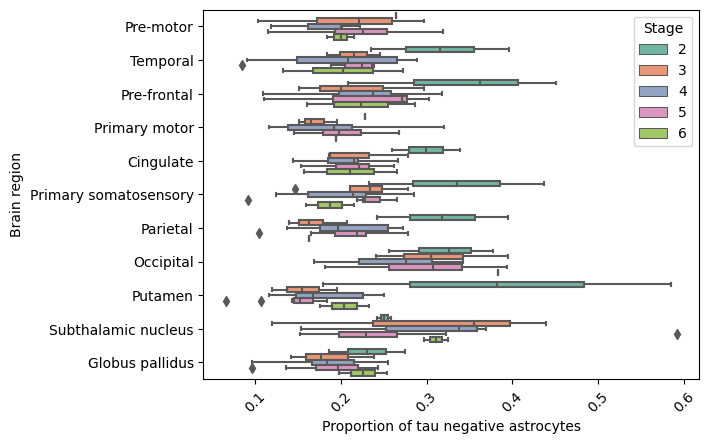

In [155]:
# Cell density (PSP only) per stage & region
ax = sns.boxplot(psp_only_stage_formatted,
                 y='region_name',
                 x='pk_Astro-',
                 hue='Stage',
                 palette='Set2')
ax.set(xlabel='Proportion of tau negative astrocytes',
       ylabel='Brain region')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0.5, 'Proportion of tau negative oligodendroglial cells'),
 Text(0.5, 0, 'Stage')]

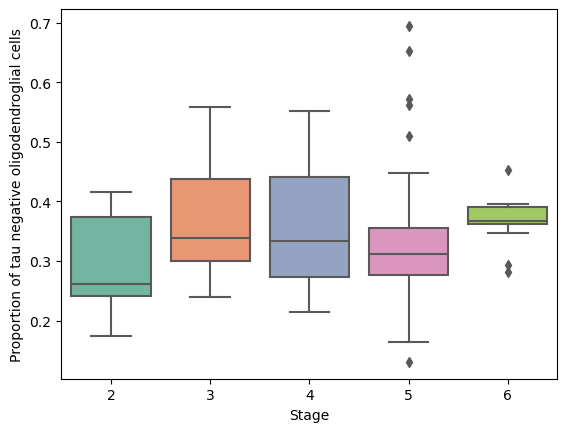

In [160]:
# Tau negative oligo / all tau negative cells: (PSP only) per stage across all regions
ax = sns.boxplot(psp_only_stage_formatted_cortical,
                 y='pk_Oligo-',
                 x='Stage',
                 palette='Set2')
ax.set(ylabel='Proportion of tau negative oligodendroglial cells',
       xlabel='Stage')

C:\Users\mokur\AppData\Local\Temp\ipykernel_20352\1250496618.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


[Text(0.0, 0, '0.0'),
 Text(0.1, 0, '0.1'),
 Text(0.2, 0, '0.2'),
 Text(0.30000000000000004, 0, '0.3'),
 Text(0.4, 0, '0.4'),
 Text(0.5, 0, '0.5'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.7000000000000001, 0, '0.7'),
 Text(0.8, 0, '0.8'),
 Text(0.9, 0, '0.9'),
 Text(1.0, 0, '1.0')]

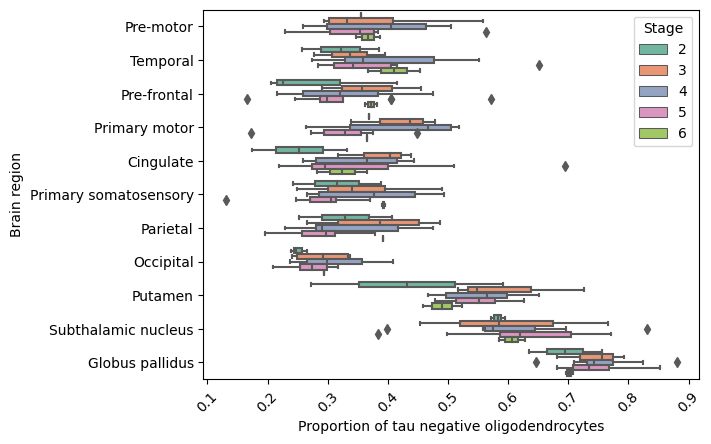

In [159]:
# Cell density (PSP only) per stage & region
ax = sns.boxplot(psp_only_stage_formatted,
                 y='region_name',
                 x='pk_Oligo-',
                 hue='Stage',
                 palette='Set2')
ax.set(xlabel='Proportion of tau negative oligodendrocytes',
       ylabel='Brain region')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)